## Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Read in Data

In [2]:
df = pd.read_csv('salary_data_clean.csv')

## Initial Observations

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$83K-$133K (Glassdoor est.),What you’ll be doing...\nBe a part of the team...,3.9,Verizon\n3.9,"Ashburn, VA",-1,10000+ Employees,2000,Company - Public,...,133,108.0,Verizon\n,VA,20,1,0,0,1,1
1,Data Scientist,$87K-$142K (Glassdoor est.),"At Farm Credit Mid-America, we believe people ...",4.0,Farm Credit Mid-America\n4.0,"Louisville, KY",-1,1001 to 5000 Employees,1985,Company - Private,...,142,114.5,Farm Credit Mid-America\n,KY,35,0,0,0,0,0
2,Data Scientist,$69K-$113K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,113,91.0,GEICO\n,MD,84,1,0,1,1,1
3,Data Scientist,$100K-$160K (Glassdoor est.),Do you love developing creative solutions to c...,4.6,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",-1,5001 to 10000 Employees,1942,Nonprofit Organization,...,160,130.0,Johns Hopkins Applied Physics Laboratory (APL)\n,MD,78,0,0,1,0,1
4,Data Scientist 2,$52K-$95K (Glassdoor est.),Description\nDigital Health and Analytics with...,3.9,Humana\n3.9,"Louisville, KY",-1,10000+ Employees,1961,Company - Public,...,95,73.5,Humana\n,KY,59,1,0,1,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn'],
      dtype='object')

## Data Feature Engineering & Minor Clean Up

* Job Titles & Seniority
* Fix some states that are not abbreviated 
* Removing additional space in front of all abbreviated states 
* Hourly Wage to Annual
* Remove new line from job title
* Convert columns to integer where needed

In [5]:
df['Job Title'].value_counts()

Data Scientist                                                      315
Data Analyst                                                         25
Senior Data Scientist                                                22
Machine Learning Engineer                                            18
Data Engineer                                                        17
                                                                   ... 
RETAINED - Senior Data Scientist (Minnesota or Remote #49602)         1
Data Engineer-remote                                                  1
FCC Data Scientist                                                    1
Clinical Laboratory Senior Scientist - Tatitlek Federal Services      1
Data Scientist/Economist/Researcher Future Pricing Strategy           1
Name: Job Title, Length: 387, dtype: int64

In [6]:
def title_simplifier(title):
    if 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [7]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simplified.value_counts()

data scientist    661
analyst           177
data engineer      67
na                 43
mle                22
manager            20
director            5
Name: job_simplified, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority.value_counts()

na        795
senior    194
jr          6
Name: seniority, dtype: int64

In [11]:
df.job_state.value_counts()

 CA               208
 MA                78
 NY                77
 VA                74
 MD                52
 TX                46
 NJ                36
 WA                35
 FL                29
 DC                26
 PA                23
 NC                22
 IL                22
Remote             22
 GA                22
 MO                19
 WI                18
 UT                17
United States      16
 CO                12
 OH                11
 TN                11
 AZ                10
 AR                10
 MI                 8
 KS                 7
 CT                 7
 KY                 6
 NE                 6
 IN                 6
 MS                 5
Tennessee           5
 MN                 4
 ME                 4
California          4
 IA                 4
 RI                 3
 LA                 3
Maryland            2
 WV                 2
 NV                 2
New Jersey          2
 NM                 2
 OR                 2
American Samoa      2
 AL       

In [12]:
# Fix states that were not abbreviated
df[df['job_state']=='Tennessee'] = ' TN'
df[df['job_state']=='California'] = ' CA'
df[df['job_state']=='Maryland'] = ' MD'
df[df['job_state']=='New Jersey'] = ' NJ'
df[df['job_state']=='Wyoming'] = ' WY'
df[df['job_state']=='Utah'] = ' UT'
df[df['job_state']=='North Carolina'] = ' NC'
df[df['job_state']=='Oregon'] = ' OR'

In [13]:
df.job_state.value_counts()

 CA               212
 MA                78
 NY                77
 VA                74
 MD                54
 TX                46
 NJ                38
 WA                35
 FL                29
 DC                26
 NC                23
 PA                23
 IL                22
 GA                22
Remote             22
 MO                19
 UT                18
 WI                18
 TN                16
United States      16
 CO                12
 OH                11
 AZ                10
 AR                10
 MI                 8
 CT                 7
 KS                 7
 KY                 6
 NE                 6
 IN                 6
 MS                 5
 ME                 4
 MN                 4
 IA                 4
 LA                 3
 RI                 3
 OR                 3
 AL                 2
 SC                 2
 WV                 2
 NM                 2
American Samoa      2
 NV                 2
 WY                 1
 ID                 1
 OK       

In [14]:
# Remove extra space for all abbreviated states
df['job_state'] = df.job_state.apply(lambda x: x.strip())
df.job_state.value_counts()

CA                212
MA                 78
NY                 77
VA                 74
MD                 54
TX                 46
NJ                 38
WA                 35
FL                 29
DC                 26
NC                 23
PA                 23
Remote             22
IL                 22
GA                 22
MO                 19
WI                 18
UT                 18
United States      16
TN                 16
CO                 12
OH                 11
AZ                 10
AR                 10
MI                  8
KS                  7
CT                  7
IN                  6
KY                  6
NE                  6
MS                  5
MN                  4
ME                  4
IA                  4
LA                  3
OR                  3
RI                  3
NV                  2
WV                  2
AL                  2
NM                  2
American Samoa      2
SC                  2
MT                  1
DE                  1
VT        

In [15]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3870
1      6569
2      4792
3      3781
4      3525
       ... 
990    2714
991    3267
992    1730
993    2216
994    2202
Name: desc_len, Length: 995, dtype: int64

In [16]:
# Hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)


In [17]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
342,1,52,43
343,1,52,43
344,1,52,43
345,1,52,43
346,1,52,43
347,1,52,43
348,1,52,43
349,1,52,43
350,1,52,43
351,1,52,43


In [18]:
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [19]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
342,1,52,86
343,1,52,86
344,1,52,86
345,1,52,86
346,1,52,86
347,1,52,86
348,1,52,86
349,1,52,86
350,1,52,86
351,1,52,86


In [20]:
# Remove '\n' in company_txt
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [21]:
df['company_txt']

0                                             Verizon
1                             Farm Credit Mid-America
2                                               GEICO
3      Johns Hopkins Applied Physics Laboratory (APL)
4                                              Humana
                            ...                      
990                                              Tala
991                                             Voice
992                              nexus IT group, Inc.
993                                            Alooba
994                        Softvision - North America
Name: company_txt, Length: 995, dtype: object

## EDA

In [22]:
# Need to convert respective columns to integer
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_len'],
      dtype='object')

In [23]:
#Replacing illegitamite ratings with 0
df['Rating'].value_counts()
df[df['Rating'] == ' TN'] = 0.0
df[df['Rating'] == ' CA'] = 0.0
df[df['Rating'] == ' MD'] = 0.0
df[df['Rating'] == ' NJ'] = 0.0
df[df['Rating'] == ' UT'] = 0.0
df[df['Rating'] == ' WY'] = 0.0
df[df['Rating'] == ' OR'] = 0.0
df[df['Rating'] == ' NC'] = 0.0

In [24]:
# Remove rows with 0.0
df = df[df['job_state'] != 0.0]
df = df[df['job_simplified'] != 0.0]

In [25]:
df['Rating'].value_counts()

-1.0    115
 3.6     85
 3.7     70
 3.9     67
 4.1     60
 4.0     58
 3.8     53
 3.5     47
 3.3     43
 3.4     41
 4.2     37
 5.0     33
 4.4     32
 3.2     30
 4.5     29
 4.6     24
 4.3     23
 4.7     21
 3.1     19
 2.8     15
 4.9     15
 3.0     13
 4.8     12
 2.9     11
 2.7      7
 2.6      6
 2.0      5
 2.5      3
 2.1      2
 2.4      2
Name: Rating, dtype: int64

In [26]:
df['Rating'] = df['Rating'].astype(int)
df['Founded'] = df['Founded'].astype(int)
df['hourly'] = df['hourly'].astype(int)
df['employer_provided'] = df['employer_provided'].astype(int)
df['min_salary'] = df['min_salary'].astype(int)
df['max_salary'] = df['max_salary'].astype(int)
df['avg_salary'] = df['avg_salary'].astype(int)
df['age'] = df['age'].astype(int)
df['python_yn'] = df['python_yn'].astype(int)
df['R_yn'] = df['R_yn'].astype(int)
df['spark_yn'] = df['spark_yn'].astype(int)
df['aws_yn'] = df['aws_yn'].astype(int)
df['excel_yn'] = df['excel_yn'].astype(int)
df['desc_len'] = df['desc_len'].astype(int)

In [27]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,978.000000,978.000000,978.000000,978.0,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,2.862986,1550.774029,0.030675,0.0,74.973415,126.822086,99.599182,30.919223,0.646217,0.011247,0.208589,0.248466,0.528630,4069.617587
std,1.539530,817.706887,0.172523,0.0,27.373367,37.352220,33.173297,42.427476,0.478388,0.105510,0.406508,0.432345,0.499435,1730.356756
min,-1.000000,-1.000000,0.000000,0.0,11.000000,58.000000,34.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,799.000000
25%,3.000000,1868.000000,0.000000,0.0,54.000000,101.000000,79.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2898.000000
50%,3.000000,1983.500000,0.000000,0.0,74.000000,120.000000,99.000000,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3942.000000
75%,4.000000,2007.000000,0.000000,0.0,93.000000,154.000000,123.000000,40.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4933.500000
max,5.000000,2020.000000,1.000000,0.0,134.000000,219.000000,176.000000,238.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16050.000000


In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_len'],
      dtype='object')

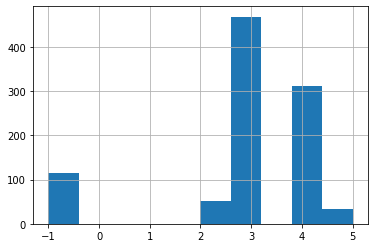

In [29]:
df.Rating.hist()

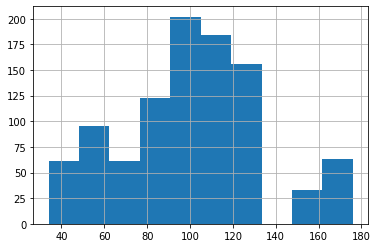

In [30]:
df.avg_salary.hist()

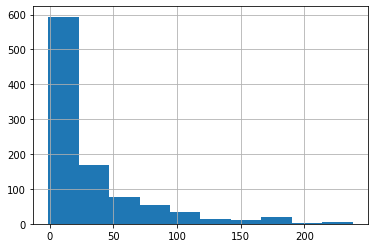

In [31]:
df.age.hist()

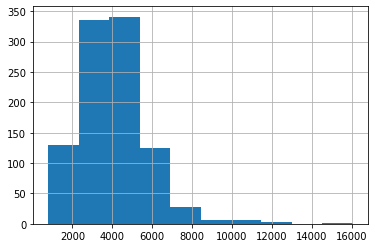

In [32]:
df.desc_len.hist()

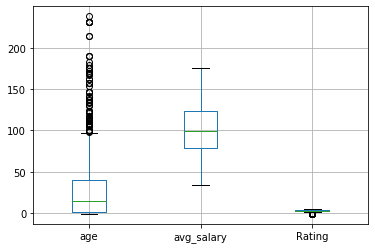

In [33]:
df.boxplot(column = ['age','avg_salary','Rating'])

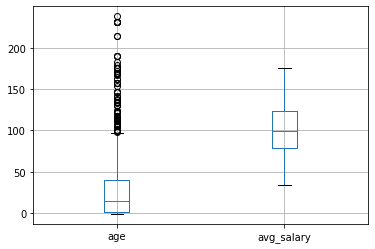

In [34]:
df.boxplot(column = ['age','avg_salary'])

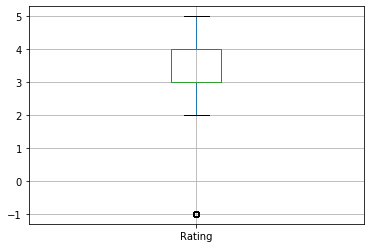

In [35]:
df.boxplot(column = 'Rating')

In [36]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.001368,0.232859,0.119631
avg_salary,-0.001368,1.000000,-0.017390,-0.026022
Rating,0.232859,-0.017390,1.000000,-0.027616
desc_len,0.119631,-0.026022,-0.027616,1.000000


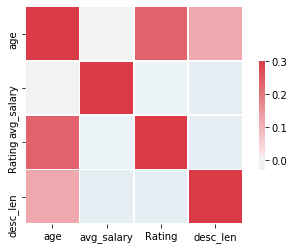

In [37]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax =.3, center = 0, cmap = cmap,
           square = True, linewidths = .5, cbar_kws = {"shrink":.5})

In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_len'],
      dtype='object')

In [39]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state',
   'python_yn', 'R_yn', 'spark_yn','aws_yn', 'excel_yn', 'job_simplified', 'seniority']]

graph for Location: total = 279


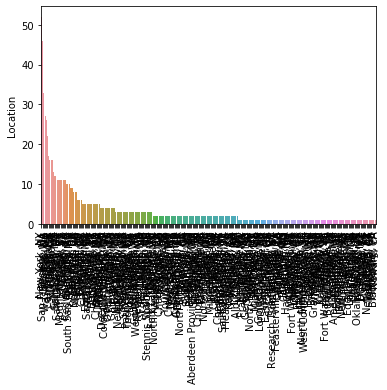

graph for Headquarters: total = 1


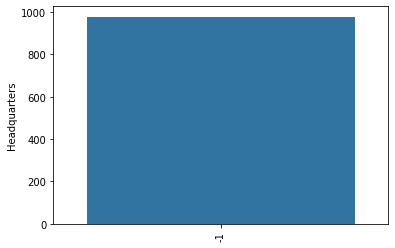

graph for Size: total = 9


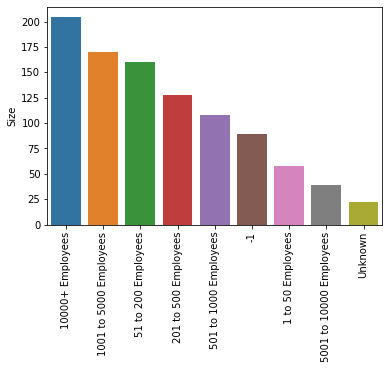

graph for Founded: total = 127


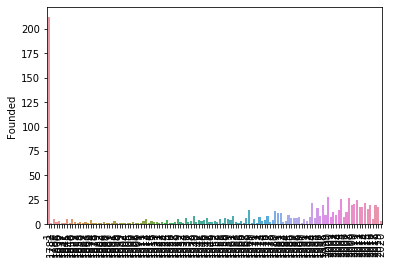

graph for Type of ownership: total = 12


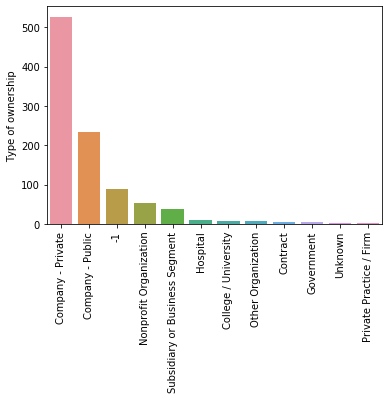

graph for Industry: total = 72


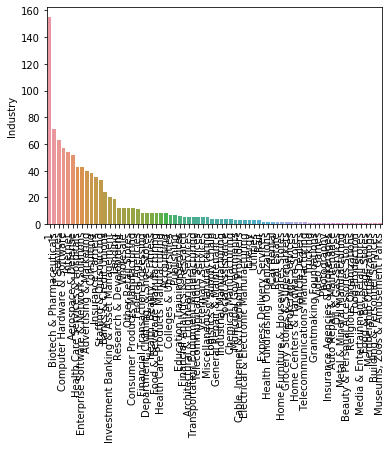

graph for Sector: total = 24


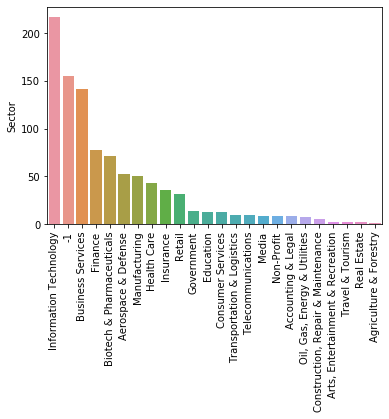

graph for Revenue: total = 14


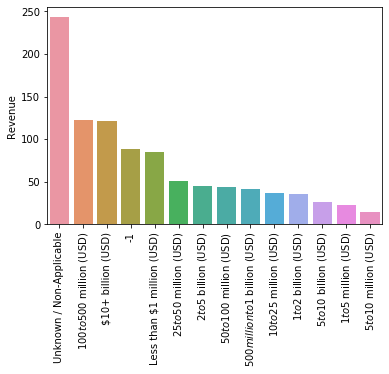

graph for company_txt: total = 581


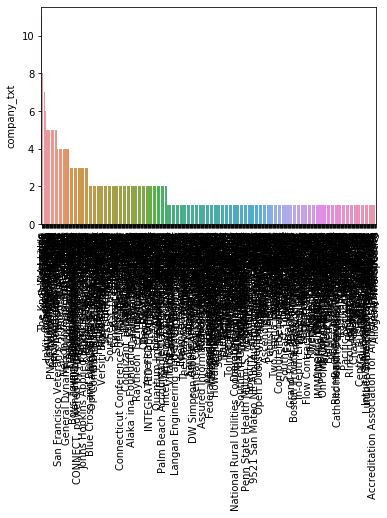

graph for job_state: total = 48


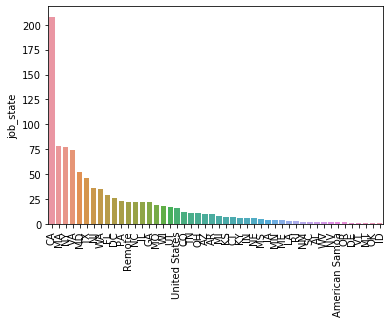

graph for python_yn: total = 2


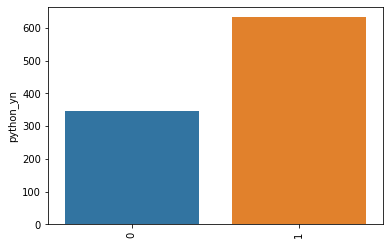

graph for R_yn: total = 2


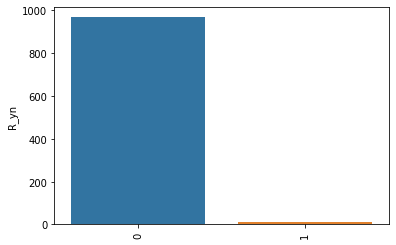

graph for spark_yn: total = 2


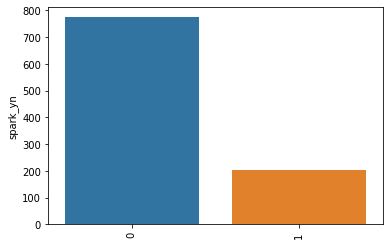

graph for aws_yn: total = 2


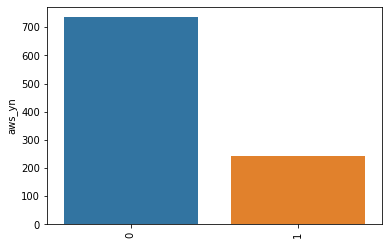

graph for excel_yn: total = 2


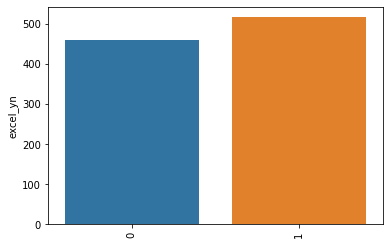

graph for job_simplified: total = 7


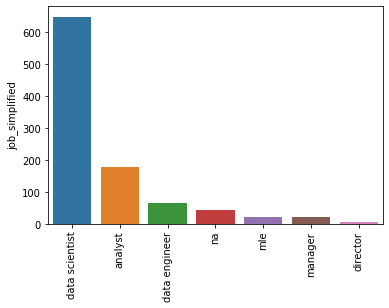

graph for seniority: total = 3


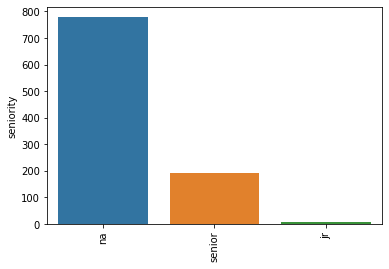

In [40]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x =  cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

graph for Location: total = 20


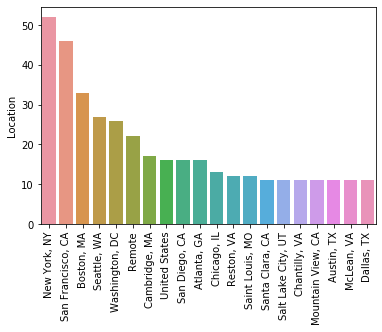

graph for company_txt: total = 20


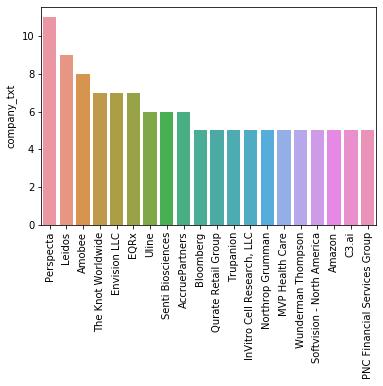

In [41]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x =  cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_len'],
      dtype='object')

In [43]:
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary')

avg_salary
job_state job_simplified            
AL        analyst            176.000
          na                  80.000
AR        analyst             76.000
          data scientist      96.625
AZ        analyst             82.250
...                              ...
WI        data engineer       94.200
          data scientist     135.500
          manager             65.000
          na                 123.000
WV        data scientist     109.000

[142 rows x 1 columns]

In [44]:
df.job_simplified.value_counts()

data scientist    647
analyst           177
data engineer      66
na                 42
mle                21
manager            20
director            5
Name: job_simplified, dtype: int64

In [45]:
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary').sort_values('job_state',ascending = False)

avg_salary
job_state job_simplified            
WV        data scientist     109.000
WI        na                 123.000
          manager             65.000
          data scientist     135.500
          data engineer       94.200
...                              ...
AZ        data engineer       65.000
AR        analyst             76.000
          data scientist      96.625
AL        na                  80.000
          analyst            176.000

[142 rows x 1 columns]

In [46]:
pd.pivot_table(df,index = ['job_simplified','seniority'], values = 'avg_salary')

avg_salary
job_simplified seniority            
analyst        jr         100.500000
               na          91.426471
               senior      93.783784
data engineer  na          95.227273
               senior      85.045455
data scientist jr          94.000000
               na         102.404175
               senior     104.525424
director       na         102.800000
manager        na          87.866667
               senior      92.000000
mle            na         101.523810
na             na         100.935484
               senior      90.818182

In [47]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index = ['job_state','job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state      job_simplified            
WV             data scientist           2
WI             na                       1
               manager                  1
               data scientist           2
               data engineer            5
               analyst                  9
WA             data engineer            1
               analyst                  8
               data scientist          23
               manager                  1
               na                       2
VT             data scientist           1
VA             mle                      3
               data scientist          56
               data engineer            5
               analyst                 10
United States  data engineer            5
               analyst                  3
               mle                      2
               data scientist           6
UT             data scientist          11
               data engineer            3
               analyst                  3
TX             na                       3
               mle                      3
               data scientist          30
               data engineer            4
               analyst                  6
TN             na                       3
               data scientist           7
               analyst                  1
SC             na                       1
               manager                  1
Remote         data engineer            2
               analyst                  3
               data scientist          16
               na                       1
RI             data scientist           2
               analyst                  1
PA             na                       5
               manager                  1
               data scientist          10
               data engineer            1
               analyst                  6
OR             analyst                  1
               na                       1
OK             analyst                  1
OH             na                       1
               data scientist           7
               data engineer            2
               analyst                  1
NY             data scientist          49
               analyst                 21
               mle                      2
               na                       2
               manager                  3
NV             data scientist           1
               analyst                  1
NM             na                       1
               data scientist           1
NJ             na                       1
               mle                      1
               manager                  2
               data scientist          26
               data engineer            1
               analyst                  5
NE             analyst                  2
               data scientist           4
NC             data scientist          17
               na                       2
               analyst                  3
MT             data scientist           1
MS             analyst                  5
MO             data scientist          16
               data engineer            1
               analyst                  2
MN             data scientist           2
               data engineer            2
MI             data scientist           6
               data engineer            1
               analyst                  1
ME             data scientist           3
               analyst                  1
MD             analyst                  1
               data scientist          38
               data engineer            4
               director                 1
               na                       8
MA             manager                  2
               data engineer            5
               data scientist          50
               analyst                 16
               mle                      4
               na                       1

In [48]:
pd.pivot_table(df[df.job_simplified == 'data scientist'],index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
WI,135.500000
IN,123.000000
FL,115.750000
MD,115.526316
DC,115.312500
AZ,115.000000
NJ,114.538462
DE,114.000000
Remote,113.000000


In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_len'],
      dtype='object')

In [50]:
# rating,industry, sector, revenue, hourly, python, r, spark, aws, excel, desc_len, Type of ownership 

In [51]:
df_pivots = df[['Rating','Industry','Sector','Revenue','hourly','python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn','desc_len','Type of ownership','avg_salary']]

In [52]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i,values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
-1      100.269565
 2      100.137255
 3      100.047009
 4       99.289389
 5       93.000000
Industry
                                         avg_salary
Industry                                           
Beauty & Personal Accessories Stores     167.000000
Insurance Agencies & Brokerages          167.000000
Vehicle Dealers                          138.000000
Photography                              131.000000
Transportation Equipment Manufacturing   130.600000
Municipal Governments                    128.666667
Food Production                          123.000000
Industrial Manufacturing                 119.750000
Logistics & Supply Chain                 117.250000
Energy                                   117.000000
Education Training Services              115.333333
Grocery Stores & Supermarkets            114.000000
Oil & Gas Services                       114.000000
Membership Organizations                 114.000000
Trucking           

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [53]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn',values = 'avg_salary',aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),15,21
$1 to $5 million (USD),4,19
$10 to $25 million (USD),16,21
$10+ billion (USD),39,82
$100 to $500 million (USD),34,88
$2 to $5 billion (USD),26,19
$25 to $50 million (USD),24,27
$5 to $10 billion (USD),11,15
$5 to $10 million (USD),5,10


In [54]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yiannimercer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yiannimercer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


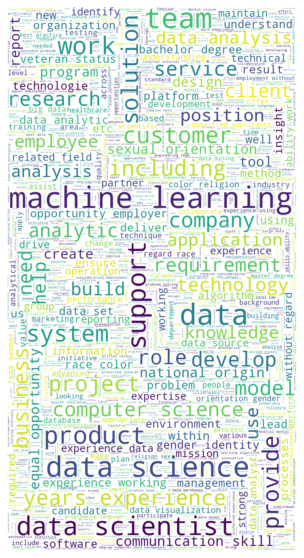

In [55]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [56]:
df.to_csv('eda_data.csv')